# Wind Speed forecasting NEMA zone

In [33]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt   
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score   
import xgboost as xgb 


from sklearn.preprocessing import MinMaxScaler 

In [3]:
df_NEMA_weather_2012 = pd.read_csv(r'C://Users//Talha//Desktop//Electric Load Forecasting//Weather//2012//NEMA//Boston 2012-01-01 to 2012-12-31.csv')
df_NEMA_weather_2013 = pd.read_csv(r'C://Users//Talha//Desktop//Electric Load Forecasting//Weather//2013//NEMA//Boston 2013-01-01 to 2013-12-31.csv')
df_NEMA_weather_2014 = pd.read_csv(r'C://Users//Talha//Desktop//Electric Load Forecasting//Weather//2014//NEMA//Boston 2014-01-01 to 2014-12-31.csv')
df_NEMA_weather_2015 = pd.read_csv(r'C://Users//Talha//Desktop//Electric Load Forecasting//Weather//2015//NEMA//Boston 2015-01-01 to 2015-12-31.csv')
df_NEMA_weather_2016 = pd.read_csv(r'C://Users//Talha//Desktop//Electric Load Forecasting//Weather//2016//NEMA//Boston 2016-01-01 to 2016-12-31.csv')
df_NEMA_weather_2017 = pd.read_csv(r'C://Users//Talha//Desktop//Electric Load Forecasting//Weather//2017//NEMA//Boston 2017-01-01 to 2017-12-31.csv')  
df_NEMA_weather_2018 = pd.read_csv(r'C://Users//Talha//Desktop//Electric Load Forecasting//Weather//2018//NEMA//Boston 2018-01-01 to 2018-12-31.csv') 
df_NEMA_weather_2019 = pd.read_csv(r'C://Users//Talha//Desktop//Electric Load Forecasting//Weather//2019//NEMA//Boston 2019-01-01 to 2019-12-31.csv')  
df_NEMA_weather_2020 = pd.read_csv(r'C://Users//Talha//Desktop//Electric Load Forecasting//Weather//2020//NEMA//Boston 2020-01-01 to 2020-12-31.csv') 
df_NEMA_weather_2021 = pd.read_csv(r'C://Users//Talha//Desktop//Electric Load Forecasting//Weather//2021//NEMA//Boston 2021-01-01 to 2021-12-31.csv')  
df_NEMA_weather_2022 = pd.read_csv(r'C://Users//Talha//Desktop//Electric Load Forecasting//Weather//2022//NEMA//Boston 2022-01-01 to 2022-12-31.csv')  
df_NEMA_weather_2023 = pd.read_csv(r'C://Users//Talha//Desktop//Electric Load Forecasting//Weather//2023//NEMA//Boston 2023-01-01 to 2023-12-31.csv')

In [4]:
df_NEMA_final_weather = pd.concat([df_NEMA_weather_2012,df_NEMA_weather_2013,df_NEMA_weather_2014,df_NEMA_weather_2015,df_NEMA_weather_2016 ,df_NEMA_weather_2017, 
                                   df_NEMA_weather_2018, df_NEMA_weather_2019, df_NEMA_weather_2020, df_NEMA_weather_2021, df_NEMA_weather_2022], ignore_index=True) 
print(df_NEMA_final_weather)

                  datetime   temp  humidity  precipprob  windspeed  \
0      2012-01-01 00:00:00   38.8     86.63           0       12.4   
1      2012-01-01 01:00:00   39.0     85.76           0        8.9   
2      2012-01-01 02:00:00   38.9     85.79           0        9.0   
3      2012-01-01 03:00:00   40.6     81.48           0        9.0   
4      2012-01-01 04:00:00   42.2     76.90           0       10.2   
...                    ...    ...       ...         ...        ...   
96427  2022-12-31 19:00:00   53.2     99.74         100        6.7   
96428  2022-12-31 20:00:00   52.2     99.73         100        6.8   
96429  2022-12-31 21:00:00   53.2     99.67         100        7.9   
96430  2022-12-31 22:00:00   52.2     99.68         100        6.8   
96431  2022-12-31 23:00:00   52.2     99.80         100        6.7   

       sealevelpressure  cloudcover  solarradiation  solarenergy  
0                1012.9         0.0             0.0          0.0  
1                1012.8  

In [5]:
# for wind power forecasting, we will be using parameters such as precipication, and wind speed, temp, air pressure, hour of day, day of year

In [6]:
df_NEMA_final_weather.isnull().sum()

datetime             0
 temp                0
humidity             0
precipprob           0
windspeed            0
sealevelpressure     0
cloudcover           0
solarradiation      22
solarenergy         22
dtype: int64

In [7]:
df_NEMA_final_weather['solarradiation'].fillna(int(df_NEMA_final_weather['solarradiation'].mean()), inplace=True)  
df_NEMA_final_weather['solarenergy'].fillna(int(df_NEMA_final_weather['solarenergy'].mean()), inplace=True) 

C:\Users\Talha\AppData\Local\Temp\ipykernel_20436\2172747306.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_NEMA_final_weather['solarradiation'].fillna(int(df_NEMA_final_weather['solarradiation'].mean()), inplace=True)
C:\Users\Talha\AppData\Local\Temp\ipykernel_20436\2172747306.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object 

In [8]:
df_NEMA_final_weather.isnull().sum()

datetime            0
 temp               0
humidity            0
precipprob          0
windspeed           0
sealevelpressure    0
cloudcover          0
solarradiation      0
solarenergy         0
dtype: int64

In [9]:
# precipication, and wind speed, temp, air pressure
df_NEMA_final_weather = df_NEMA_final_weather.drop(columns=['humidity','solarenergy', 'solarradiation', 'cloudcover']) 

In [10]:
df_NEMA_final_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96432 entries, 0 to 96431
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          96432 non-null  object 
 1    temp             96432 non-null  float64
 2   precipprob        96432 non-null  int64  
 3   windspeed         96432 non-null  float64
 4   sealevelpressure  96432 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 3.7+ MB


In [11]:
df_NEMA_final_weather.shape

(96432, 5)

In [12]:
df_NEMA_final_weather.head(10)

,datetime,temp,precipprob,windspeed,sealevelpressure
0,2012-01-01 00:00:00,38.8,0,12.4,1012.9
1,2012-01-01 01:00:00,39.0,0,8.9,1012.8
2,2012-01-01 02:00:00,38.9,0,9.0,1013.6
3,2012-01-01 03:00:00,40.6,0,9.0,1014.5
4,2012-01-01 04:00:00,42.2,0,10.2,1015.0
5,2012-01-01 05:00:00,39.1,0,6.8,1015.6
6,2012-01-01 06:00:00,39.0,0,7.8,1016.3
7,2012-01-01 07:00:00,38.9,0,7.8,1016.8
8,2012-01-01 08:00:00,40.5,0,6.7,1017.4
9,2012-01-01 09:00:00,42.3,0,6.7,1017.6


In [13]:
df = df_NEMA_final_weather

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96432 entries, 0 to 96431
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          96432 non-null  object 
 1    temp             96432 non-null  float64
 2   precipprob        96432 non-null  int64  
 3   windspeed         96432 non-null  float64
 4   sealevelpressure  96432 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 3.7+ MB


<Axes: ylabel='precipprob'>

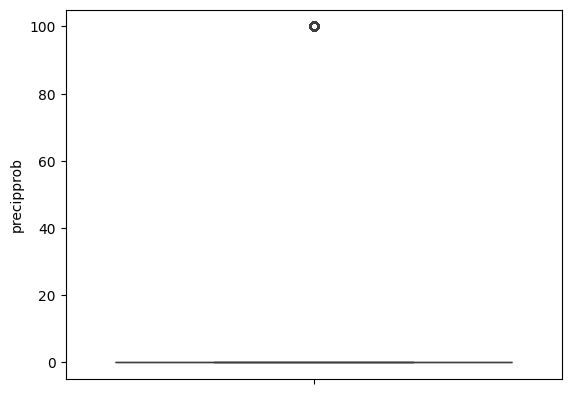

In [15]:
# Check outliers
sns.boxplot(df['precipprob'])

<Axes: ylabel=' temp'>

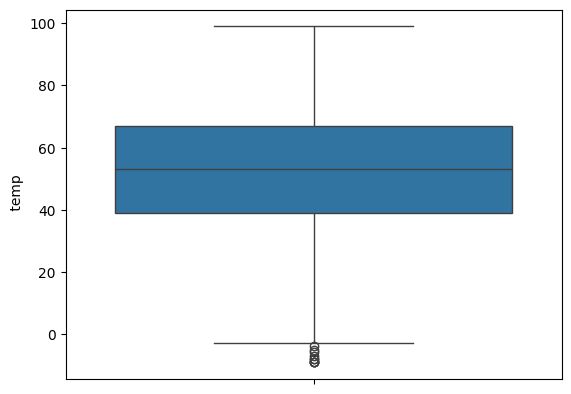

In [16]:
# Check outliers
sns.boxplot(df[' temp'])

<Axes: ylabel='sealevelpressure'>

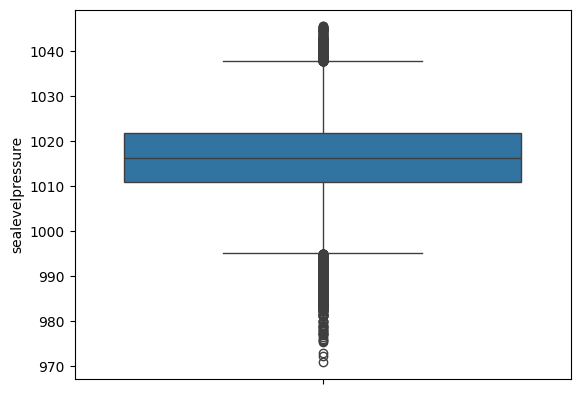

In [17]:
# Check outliers
sns.boxplot(df['sealevelpressure'])

In [18]:
# Outliers Cleaning   
# there is an outliers therefore we want to try to find limits of it
# after finding limit we use capping technique that change the outlier values
# to upper or lower limit values, additionally, used ınterquatile method
new_df_1 = df
q1 = new_df_1['sealevelpressure'].quantile(0.25) 
q3 = new_df_1['sealevelpressure'].quantile(0.75) 
iqr = q3 - q1 

upper_limit_1 = q3 + (1.5 * iqr) 
lower_limit_1 = q1 - (1.5 * iqr) 
print('upper_limit:', upper_limit_1) 
print('lower_limit:', lower_limit_1)  

new_df_1 = df.copy() 
new_df_1.loc[(new_df_1['sealevelpressure']>upper_limit_1), 'sealevelpressure'] = upper_limit_1 
new_df_1.loc[(new_df_1['sealevelpressure']<lower_limit_1), 'sealevelpressure'] = lower_limit_1

upper_limit: 1037.75
lower_limit: 994.9499999999999


<Axes: ylabel='sealevelpressure'>

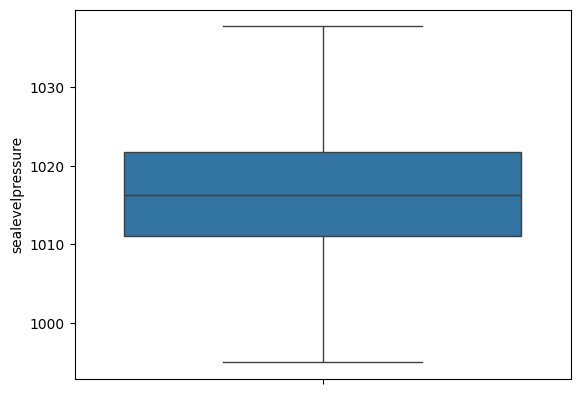

In [19]:
# Check outliers
sns.boxplot(new_df_1['sealevelpressure'])

<Axes: ylabel='windspeed'>

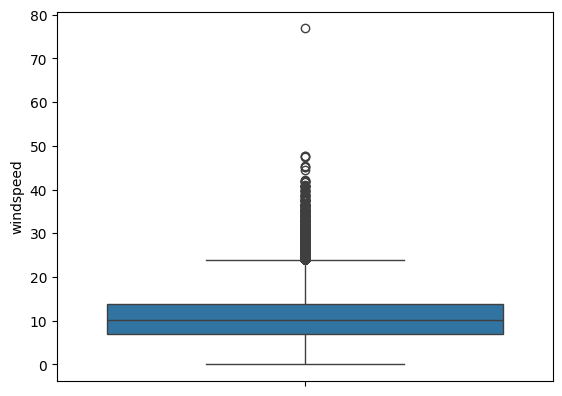

In [20]:
# Check outliers
sns.boxplot(df['windspeed'])

In [21]:
# Outliers Cleaning   
# there is an outliers therefore we want to try to find limits of it
# after finding limit we use capping technique that change the outlier values
# to upper or lower limit values, additionally, used ınterquatile method
new_df_1 = df
q1 = new_df_1['windspeed'].quantile(0.25) 
q3 = new_df_1['windspeed'].quantile(0.75) 
iqr = q3 - q1 

upper_limit_1 = q3 + (1.5 * iqr) 
lower_limit_1 = q1 - (1.5 * iqr) 
print('upper_limit:', upper_limit_1) 
print('lower_limit:', lower_limit_1)  

new_df_1 = df.copy() 
new_df_1.loc[(new_df_1['windspeed']>upper_limit_1), 'windspeed'] = upper_limit_1 
new_df_1.loc[(new_df_1['windspeed']<lower_limit_1), 'windspeed'] = lower_limit_1

upper_limit: 23.9
lower_limit: -3.299999999999999


<Axes: ylabel='windspeed'>

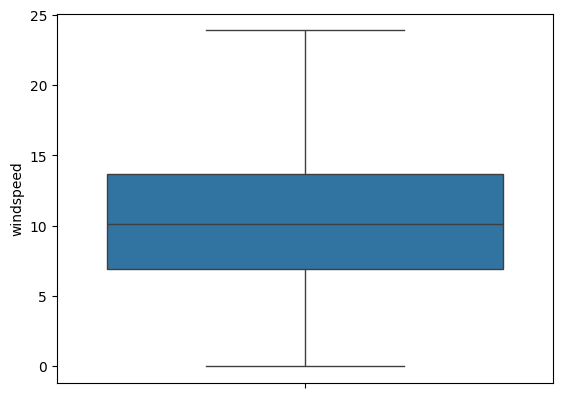

In [22]:
sns.boxplot(new_df_1['windspeed'])

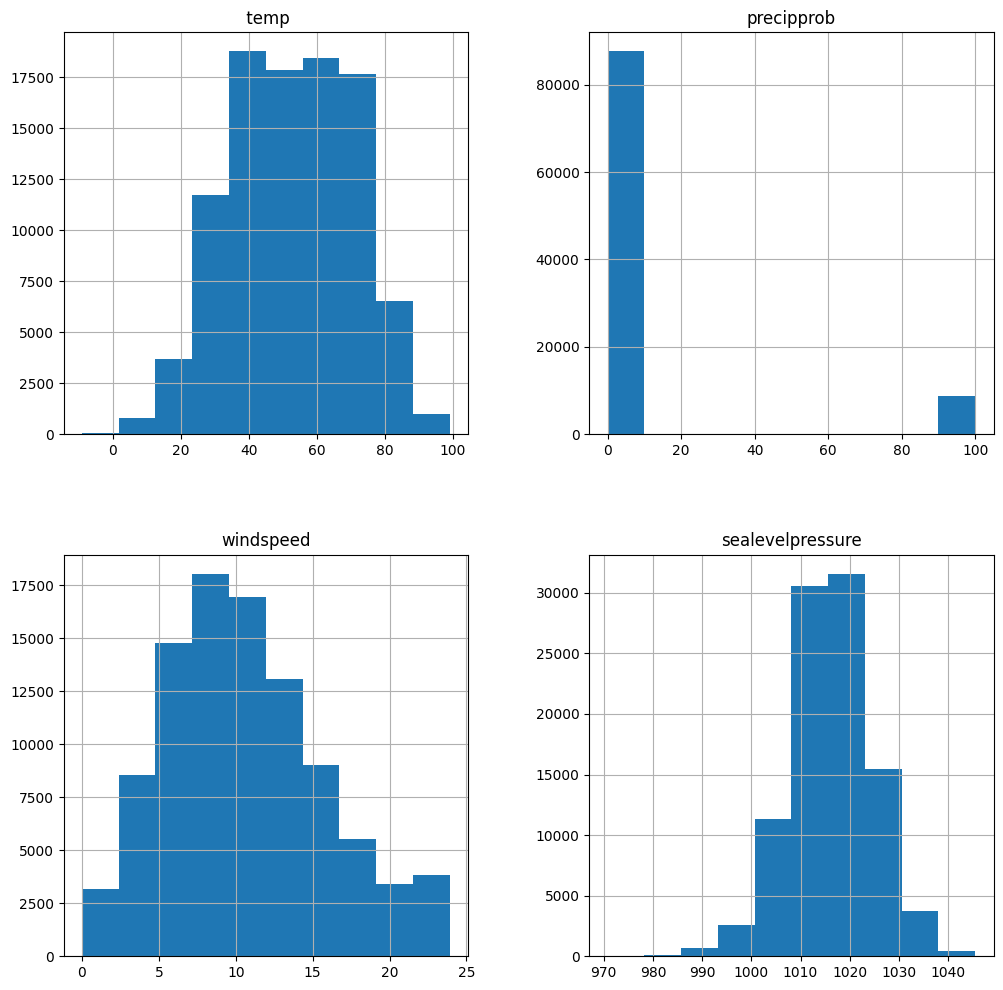

In [23]:
new_df_1.hist(figsize=(12,12))
plt.show()

In [24]:
#Setting index to Datetime
new_df_1 = new_df_1.set_index('datetime')
new_df_1.index = pd.to_datetime(new_df_1.index)

In [25]:
def create_features(df):
    
    df = df.copy()
    df['hourofday'] = df.index.hour
    df['dayofyear'] = df.index.dayofyear
    return df

new_df_1 = create_features(new_df_1) 
new_df_1

,temp,precipprob,windspeed,sealevelpressure,hourofday,dayofyear
datetime,,,,,,
2012-01-01 00:00:00,38.8,0,12.4,1012.9,0,1
2012-01-01 01:00:00,39.0,0,8.9,1012.8,1,1
2012-01-01 02:00:00,38.9,0,9.0,1013.6,2,1
2012-01-01 03:00:00,40.6,0,9.0,1014.5,3,1
2012-01-01 04:00:00,42.2,0,10.2,1015.0,4,1
...,...,...,...,...,...,...
2022-12-31 19:00:00,53.2,100,6.7,1010.4,19,365
2022-12-31 20:00:00,52.2,100,6.8,1008.9,20,365
2022-12-31 21:00:00,53.2,100,7.9,1008.2,21,365


In [26]:
new_df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96432 entries, 2012-01-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    temp             96432 non-null  float64
 1   precipprob        96432 non-null  int64  
 2   windspeed         96432 non-null  float64
 3   sealevelpressure  96432 non-null  float64
 4   hourofday         96432 non-null  int32  
 5   dayofyear         96432 non-null  int32  
dtypes: float64(3), int32(2), int64(1)
memory usage: 4.4 MB


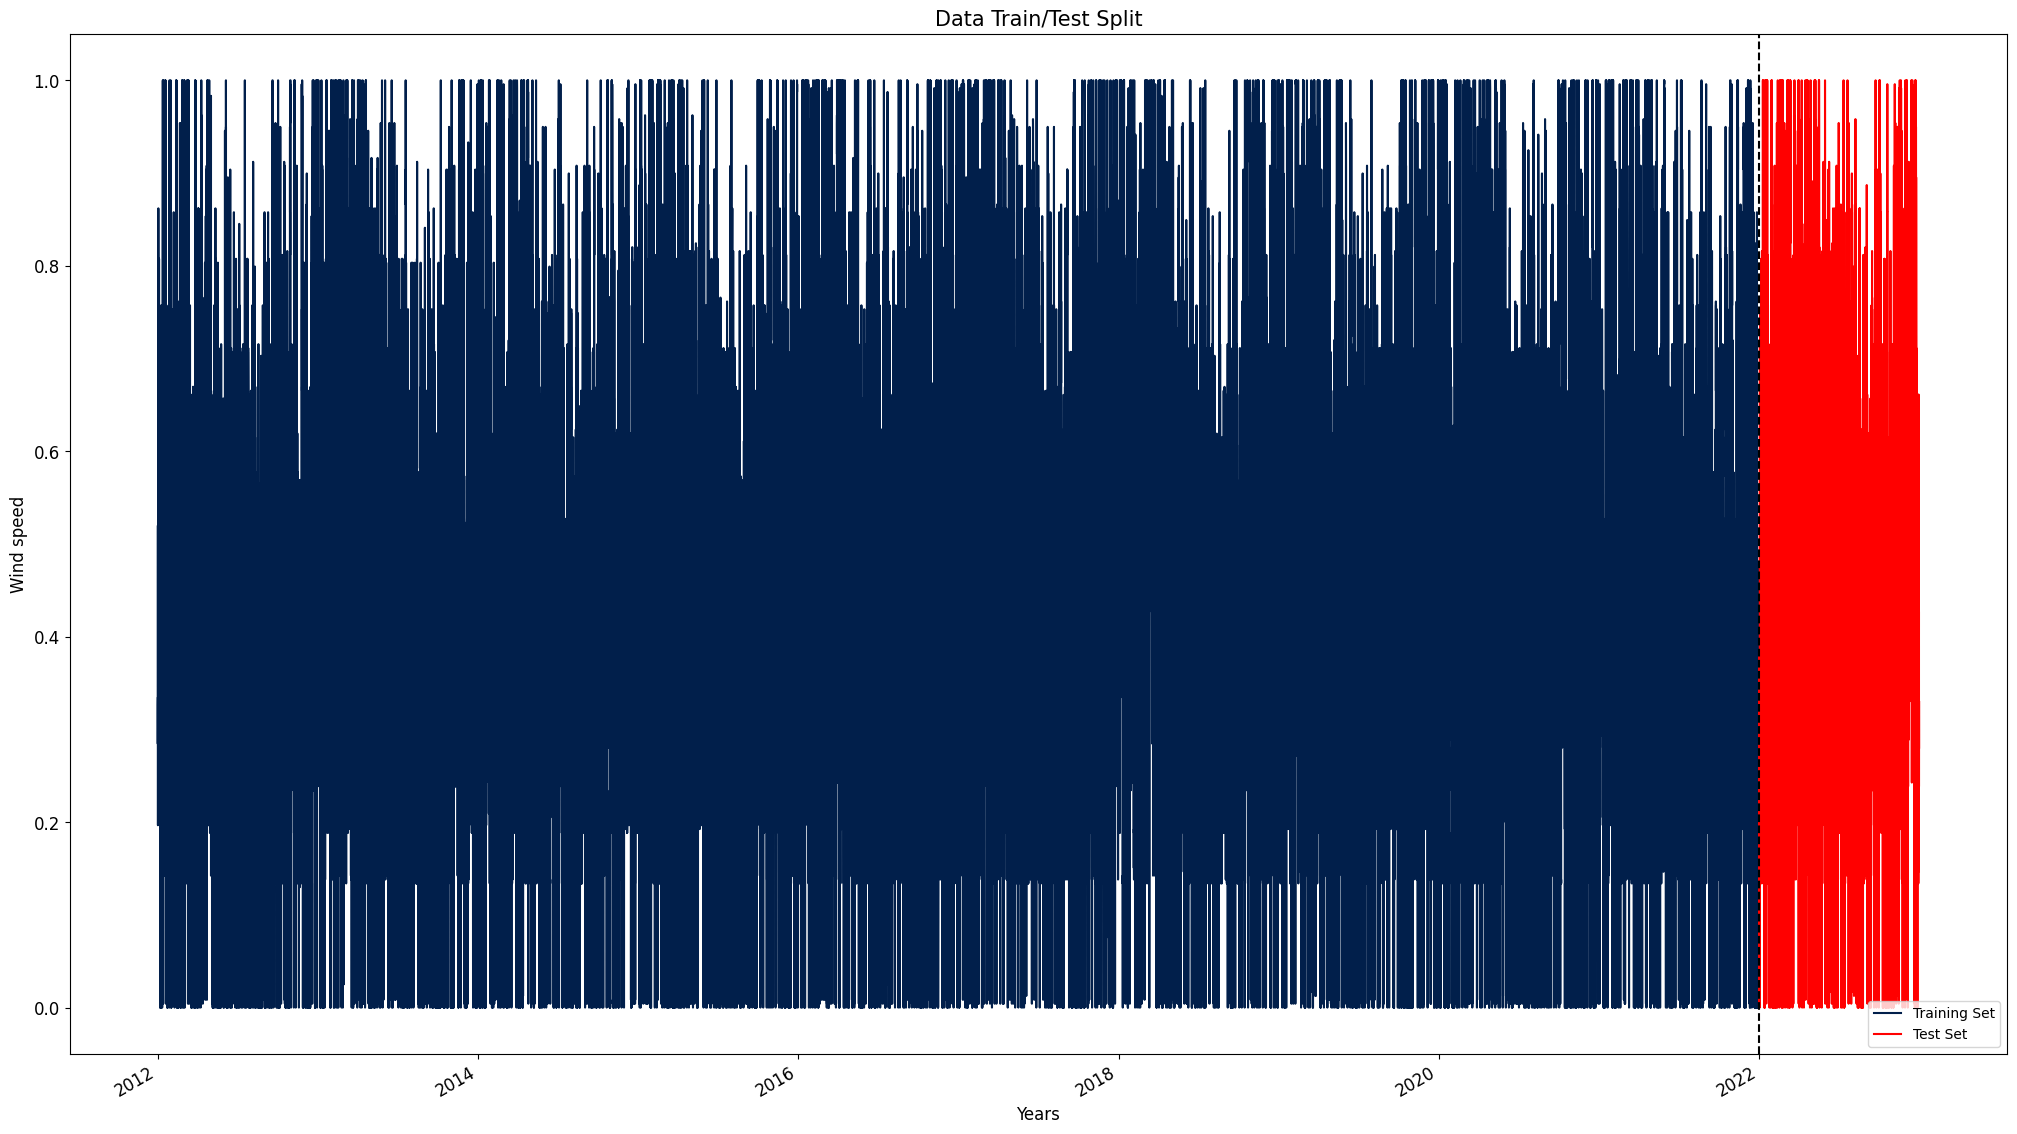

In [36]:
#Train and Test Split
df = new_df_1['windspeed']

train = df.loc[df.index < '01-01-2022']
test = df.loc[df.index >= '01-01-2022']

fig, ax = plt.subplots(figsize=(25, 15))

train.plot(ax=ax, label='Training Set', title='Data Train/Test Split', color = "#011f4b")
test.plot(ax=ax, label='Test Set', color="red")

ax.axvline('01-01-2022', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])

plt.title('Data Train/Test Split', fontsize=15)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Wind speed', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Generating plot
plt.show()

In [28]:
new_df_1.columns

Index([' temp', 'precipprob', 'windspeed', 'sealevelpressure', 'hourofday',
       'dayofyear'],
      dtype='object')

In [29]:
list_of_scale = [' temp', 'precipprob', 'windspeed', 'sealevelpressure', 'hourofday',
       'dayofyear']

# MinMaxScaler
scaler = MinMaxScaler()
new_df_1[list_of_scale] = scaler.fit_transform(new_df_1[list_of_scale]) 

In [30]:
# Our Training data goes from 1st January of 2012 until 31th of december of 2021, which is encompasses 10 years
X_train = new_df_1.loc[:'01-01-2022',[' temp', 'precipprob', 'sealevelpressure', 'hourofday',
       'dayofyear']]
y_train = new_df_1.loc[:'01-01-2022', ['windspeed']]

# Our Testing data goes from 1st January of 2022 until 31th of December of 2022, which we took 1 year for testing
X_test = new_df_1.loc['01-01-2022':,[' temp', 'precipprob', 'sealevelpressure', 'hourofday',
       'dayofyear']]
y_test = new_df_1.loc['01-01-2022':,['windspeed']]

In [31]:
print(X_train.shape)
print(y_train.shape) 
print(X_test.shape) 
print(y_test.shape)

(87696, 5)
(87696, 1)
(8760, 5)
(8760, 1)


In [38]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=10000,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.3, 
                       random_state = 48)

reg.fit(X_train, y_train,         
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100) 

[0]	validation_0-rmse:0.21289	validation_1-rmse:0.21248
[100]	validation_0-rmse:0.18424	validation_1-rmse:0.19420


c:\Users\Talha\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:47:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[200]	validation_0-rmse:0.17992	validation_1-rmse:0.19372
[300]	validation_0-rmse:0.17696	validation_1-rmse:0.19318
[400]	validation_0-rmse:0.17462	validation_1-rmse:0.19267
[500]	validation_0-rmse:0.17279	validation_1-rmse:0.19283
[600]	validation_0-rmse:0.17121	validation_1-rmse:0.19271
[700]	validation_0-rmse:0.16984	validation_1-rmse:0.19336
[800]	validation_0-rmse:0.16848	validation_1-rmse:0.19434
[900]	validation_0-rmse:0.16731	validation_1-rmse:0.19403
[1000]	validation_0-rmse:0.16631	validation_1-rmse:0.19461
[1100]	validation_0-rmse:0.16534	validation_1-rmse:0.19505
[1200]	validation_0-rmse:0.16450	validation_1-rmse:0.19494
[1300]	validation_0-rmse:0.16369	validation_1-rmse:0.19528
[1400]	validation_0-rmse:0.16296	validation_1-rmse:0.19562
[1500]	validation_0-rmse:0.16225	validation_1-rmse:0.19580
[1600]	validation_0-rmse:0.16157	validation_1-rmse:0.19615
[1700]	validation_0-rmse:0.16091	validation_1-rmse:0.19635
[1800]	validation_0-rmse:0.16025	validation_1-rmse:0.19695
[1900

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [43]:
y_prediction = reg.predict(X_test) 

In [44]:
mae = mean_absolute_error(y_test, y_prediction) 
mse = mean_squared_error(y_test, y_prediction) 
r2 = r2_score(y_test, y_prediction) 
rmse = np.sqrt(mean_squared_error(y_test, y_prediction)) 

print('mean absolute error :', mae) 
print('mean squared error :', mse)
print('R2 :', r2)
print('Root mean square deviation:', rmse)

mean absolute error : 0.16283141483848612
mean squared error : 0.04362366447867395
R2 : 0.07868094637139234
Root mean square deviation: 0.20886278864047073


In [45]:
##Merging predictions with original dataset
y_test_1 = pd.DataFrame(y_test)
y_test_1['prediction_XGB'] = reg.predict(X_test)
new_df_1 = new_df_1.merge(y_test_1[['prediction_XGB']], how='left', left_index=True, right_index=True)

new_df_1.tail()

,temp,precipprob,windspeed,sealevelpressure,hourofday,dayofyear,prediction_XGB
datetime,,,,,,,
2022-12-31 19:00:00,0.576318,1.0,0.280335,0.530120,0.826087,0.99726,1.274933
2022-12-31 20:00:00,0.567068,1.0,0.284519,0.510040,0.869565,0.99726,1.177004
2022-12-31 21:00:00,0.576318,1.0,0.330544,0.500669,0.913043,0.99726,1.032287
2022-12-31 22:00:00,0.567068,1.0,0.284519,0.487282,0.956522,0.99726,0.616764
2022-12-31 23:00:00,0.567068,1.0,0.280335,0.473896,1.000000,0.99726,0.815777


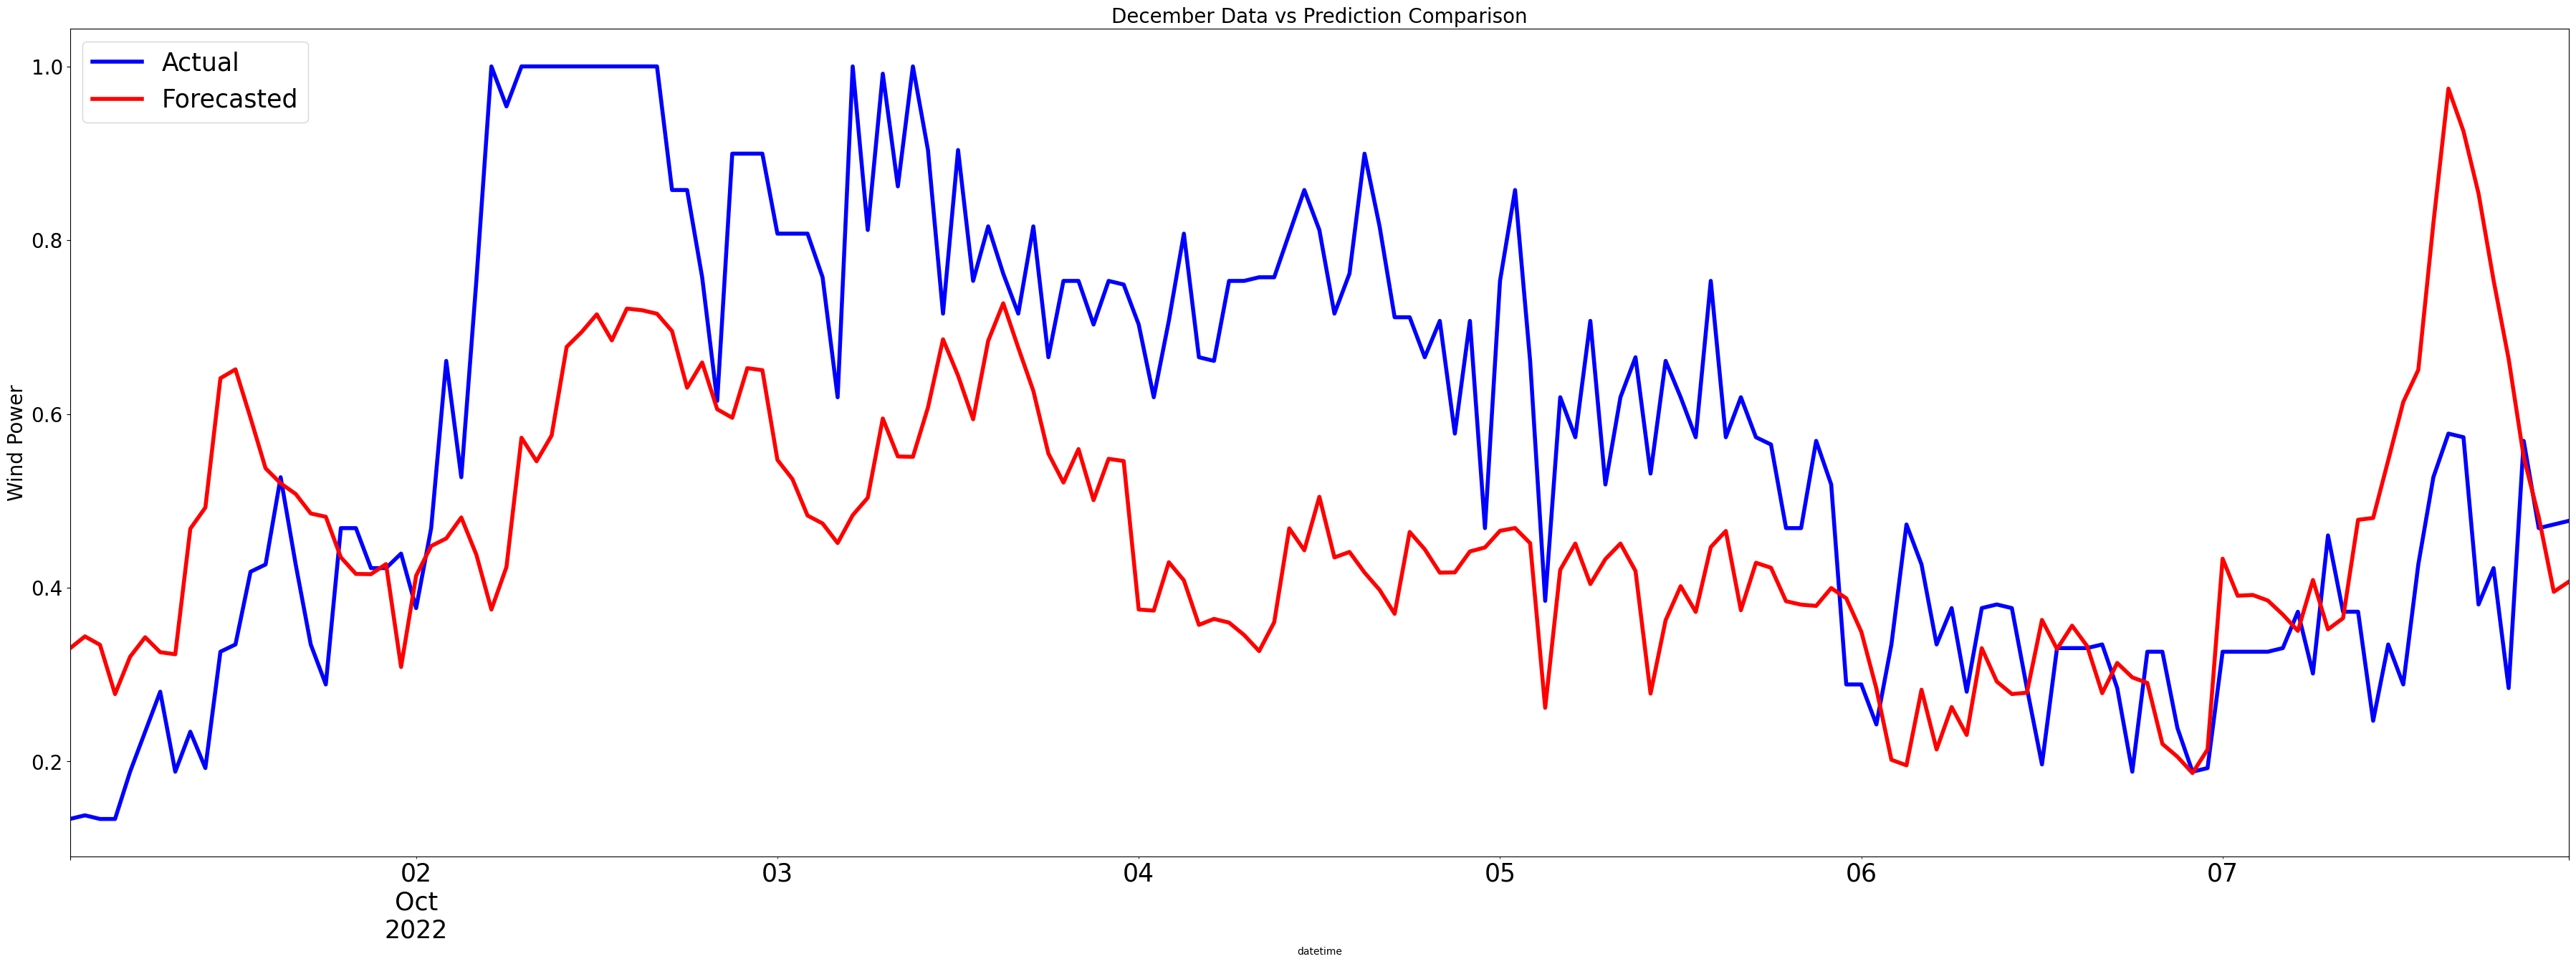

In [49]:
##Printing December predictions on chart to visually assess accuracy
ax = new_df_1.loc[(new_df_1.index > '10-01-2022') & (new_df_1.index < '10-08-2022')]['windspeed'] \
    .plot(figsize=(45, 15), title='December Data vs Prediction Comparison', color = "blue", linewidth = 4)
new_df_1.loc[(new_df_1.index > '10-01-2022') & (new_df_1.index < '10-08-2022')]['prediction_XGB'] \
    .plot(style='-', color = "red", linewidth = 4, fontsize=25)

plt.title('December Data vs Prediction Comparison', fontsize=20) 
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
plt.ylabel('Wind Power', fontsize=20) 
plt.legend(['Actual','Forecasted'], fontsize = 25) 

plt.show()